<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:Brown;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:center;"
          >
       WELCOME TO MY NOTEBOOK
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:green;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:left;"
          >
      About Dataset: Water Quality and Potability
</p>
</div>

![](https://i.gifer.com/embedded/download/YVcy.gif)

> This dataset contains total 10 Columns, the first 9 columns are used as a input features,namely, PH value, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic Carbon, Trihalomethanes,Turbidity. In this dataset our main goal is to predict the water potability with values 1 (potable) and 0 (not potable).

> Thank you for exploring my notebook, and,  I would really appreciate your support through an upvote😊

# Import all the Necessary Libraries 

In [ ]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report


import warnings 
warnings.filterwarnings("ignore")

In [ ]:
# Read the dataset
dataframe=pd.read_csv("./water_potability.csv")
dataframe.head(10)

In [ ]:
# check the shape of the dataset
dataframe.shape

In [ ]:
# To Check Is there any null values in the dataset
dataframe.isnull().sum()

> Here we can see that there are lot of missing values in the dataset pertaining to the columns ph, sulphate and Trihalomethanes.

In [ ]:
# To check Is there any duplicate value in the dataset
dataframe.duplicated().sum()

> There is no duplicate value in the dataset

In [ ]:
# Lets describe the dataset
dataframe.describe()

In [ ]:
# Lets make the correlation matrix
dataframe.corr()

# Lets visualise the correlation matrix

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(dataframe.corr(), annot=True, cmap="Purples", fmt=".2f")
plt.show()

# Exploratory Data Analysis

> # Univariate Analysis

In [ ]:
# Lets visualise the data distribution of  target variable
plt.figure(figsize=(5,5))
sns.countplot(data=dataframe, x=dataframe["Potability"], color="red")
plt.show()

In [ ]:
# Lets visualise the distribution of the numerical value with respect to Potability(target variable)
columns=dataframe.select_dtypes(exclude="object").columns
for i in range(len(columns)-1):
    plt.figure(figsize=(8,5))
    sns.histplot(data=dataframe, x=dataframe[columns[i]], hue="Potability", kde=True, color="red", multiple="stack", bins=20)
    plt.title(f"{columns[i]} vs Potability")
    plt.show()

> # Bivariate Analysis

In [ ]:
# To check the outliers in the dataset with the help of Boxplot
colors=["red","blue","green","grey","purple","violet","brown","black", "orange"]
for i in  range(len(columns)-1):
    plt.figure(figsize=(7,5))
    sns.boxplot(data=dataframe, x=dataframe["Potability"], y=dataframe[columns[i]], color=colors[i])
    plt.title(f"{columns[i]}  vs Potability")
    plt.show()


# Split the dataset into Train and Test Split

In [ ]:
# Lets Split the dataset first
def train_test_split_data(dataframe, target, random_state, test_size):
    
    x_train,y_train,x_test,y_test= train_test_split(dataframe.drop([target], axis=1),
                                                    dataframe[target],
                                                    test_size=test_size,
                                                    random_state=random_state,
                                                    stratify=dataframe[target])
                                     
    return x_train, x_test, y_train,y_test

In [ ]:
x_train, y_train, x_test, y_test= train_test_split_data(dataframe,target="Potability", random_state=42, test_size=0.3)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# First delete the outliers from the dataset and then handle the missing values

In [ ]:
def Percentile_Capping(columns, x_train, y_train, a, b):
    
    outliers=[]
    for col in columns:
        q1=np.percentile(x_train[col], a)
        q2=np.percentile(x_train[col], b)
    
    for i in range(len(x_train)):
        if x_train[col].iloc[i]>q2 or  x_train[col].iloc[i]<q1:
            outliers.append(i)
            
    outliers=set(outliers)    # to remove the duplicate values in the dataset
    outliers=list(outliers)
            
            
    x_train.drop(x_train.index[outliers], inplace=True)   # remove the outliers from the trainin data
    y_train.drop(y_train.index[outliers], inplace=True)
            
    ratio= round(len(outliers)/len(x_train)*100,2)
            
            
    return x_train, y_train, ratio

In [ ]:
x_train, y_train, ratio= Percentile_Capping(x_train.select_dtypes(exclude="object").columns, x_train, y_train, a=2, b=98)

In [ ]:
x_train.shape, y_train.shape

In [ ]:
print(f"Ratio of outliers in the dataset:{ratio}")

# Lets handle the missing value in the Training Data

In [ ]:
x_train.isna().sum()

In [ ]:
# genereate the random values and then fill the missing values in Ph columns
lower_limit=0
upper_limit=14
missing_values=330

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_train["ph"]= x_train["ph"].fillna(pd.Series(random_numbers, index=x_train.index[x_train["ph"].isna()]))

In [ ]:
# genereate the random values and then fill the missing values in sulfate columns
lower_limit=129
upper_limit=481
missing_values=527

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_train["Sulfate"]= x_train["Sulfate"].fillna(pd.Series(random_numbers, index=x_train.index[x_train["Sulfate"].isna()]))

In [ ]:
# genereate the random values and then fill the missing values in Trihalomethanes columns
lower_limit=0.7
upper_limit=124
missing_values=110

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_train["Trihalomethanes"]= x_train["Trihalomethanes"].fillna(pd.Series(random_numbers, index=x_train.index[x_train["Trihalomethanes"].isna()]))

# Lets handle the missing value in the Testing Data


In [ ]:
x_test.isna().sum()

In [ ]:
lower_limit=0
upper_limit=14
missing_values=147

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_test["ph"]= x_test["ph"].fillna(pd.Series(random_numbers, index=x_test.index[x_test["ph"].isna()]))

In [ ]:
lower_limit=129
upper_limit=481
missing_values=232

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_test["Sulfate"]= x_test["Sulfate"].fillna(pd.Series(random_numbers, index=x_test.index[x_test["Sulfate"].isna()]))

In [ ]:
lower_limit=0.7
upper_limit=124
missing_values=46

random_numbers= np.random.uniform(lower_limit, upper_limit, missing_values)
x_test["Trihalomethanes"]= x_test["Trihalomethanes"].fillna(pd.Series(random_numbers, index=x_test.index[x_test["Trihalomethanes"].isna()]))

In [ ]:
x_train.head()

In [ ]:
x_test.head()

# Data Preprocessing

In [ ]:
columns=x_train.select_dtypes(exclude="object").columns
scaler= MinMaxScaler()
x_train[columns]= scaler.fit_transform(x_train[columns])
x_test[columns]= scaler.transform(x_test[columns])

In [ ]:
x_train.head()

In [ ]:
x_test.head()

# Lets do the Modelling
> # Ensemble Learning
> # RandomForestClassifier: Finding best parameters using GridSearchCV

In [32]:
rf=RandomForestClassifier()
hyper_params={"max_features": [1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "n_estimators":[100,300, 400, 500],
              "criterion":["gini"]}

model=GridSearchCV(rf, hyper_params, cv=5, scoring="f1_macro", n_jobs=-1)
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(model.best_estimator_)

print("----------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")



print("Classification_Report")
print("-----------------------")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

KeyboardInterrupt: 

> # LightGradientBoostingClassifier 

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
Accuracy:0.6317395727365208
F1-Score:0.3864406779661017
Precision:0.29765013054830286
Recall:0.55072463768115

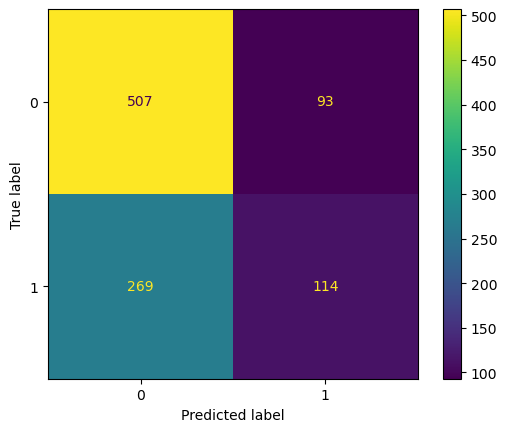

In [33]:
import lightgbm as lgb
hyper_params = {
                 "objective":'binary', 
                 "num_leaves":9,
                 "learning_rate": 0.01, 
                 "n_estimators":1000,
                 "max_bin": 500, 
                 "bagging_fraction": 0.8,
                 "bagging_freq": 4, 
                 "bagging_seed": 8,
                 "feature_fraction_seed": 8,
                 "min_sum_hessian_in_leaf":11,
                 "verbose": 0,
                "random_state": 42
               }

model_lgb= lgb.LGBMClassifier(**hyper_params)
model_lgb.fit(x_train,y_train)
y_pred= model_lgb.predict(x_test)


# Print the Results
print(f"Accuracy:{accuracy_score(y_pred,y_test)}")
print(f"F1-Score:{f1_score(y_pred,y_test)}")
print(f"Precision:{precision_score(y_pred,y_test)}")
print(f"Recall:{recall_score(y_pred,y_test)}")



print("Classification_Report")
print("-----------------------")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

> # GradientBoostingClassifier

In [ ]:
gbd= GradientBoostingClassifier()
hyper_params = { "learning_rate": [0.05, 0.1, 0.2,0.01],
                 "min_samples_split": [2,3,10,12,12],
                 "min_samples_leaf": [1,3,10],
                "n_estimators":[100,200,300,400,500],
                "max_features":[1,4,6,8]
                 
                      }

model=GridSearchCV(gbd, hyper_params, cv=5, scoring="f1_macro", n_jobs=-1)
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(model.best_estimator_)

print("----------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")



print("Classification_Report")
print("-----------------------")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

> # catboost

In [ ]:
from catboost import CatBoostRegressor

# 建立模型
model = CatBoostRegressor(random_state=42,
                         loss_function='RMSE',
                         eval_metric='RMSE',
                         use_best_model=True)
# 使用訓練資料訓練模型
model.fit(x_train,y_train, eval_set=(x_test, y_test), verbose=1, plot=True)

In [ ]:
from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm

# feature_names = ['F{}'.format(i) for i in range(X_train.shape[1])]
train_pool = Pool(x_train, y_train, feature_names=dataframe.feature_names.tolist())
test_pool = Pool(x_test, y_test, feature_names=dataframe.feature_names.tolist())

model = CatBoostRegressor(random_state=42,
                         loss_function='RMSE',
                         eval_metric='RMSE',
                         use_best_model=True)
summary = model.select_features(
    train_pool,
    eval_set=test_pool,
    features_for_select='0-12',
    num_features_to_select=3,
    steps=2,
    algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=EShapCalcType.Regular,
    train_final_model=True,
    logging_level='Silent',
    plot=False
)
summary